In [ ]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [ ]:
#menghitung nilai fitness suatu populasi
def fitness_func(population, time, priority, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * priority)
        S2 = np.sum(population[i] * time)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)

In [ ]:
#menghitung nilai fitness suatu individu
def fitness_func_one(individual, time, priority, threshold):
    fitness = 0
    waktu_dibutuhkan = 0
    for i in range(len(individual)):
        if (individual[i] == 1):
            fitness = fitness + priority[i]
            waktu_dibutuhkan = waktu_dibutuhkan + time[i]
    if (waktu_dibutuhkan > threshold):
        fitness = 0
    return fitness

In [ ]:
#membentuk populasi offspring
def generate_offsprings_func(population, sigma):
    offsprings = np.empty((population.shape))
    k = np.random.randint(0,10)
    for i in range(population.shape[0]):
        offsprings[i] = population[i]
    for i in range(population.shape[0]):
        for j in range (k):
          if (offsprings[i][j] == 0):
            offsprings[i][j] = 1
          else:
            offsprings[i][j] = 0
    return offsprings.astype(int)

In [ ]:
#seleksi parent & offspring
def selection(population, offsprings, solutions_per_pop, time, priority, threshold):
  num_opponent = int (solutions_per_pop/2)
  opponent = []
  population_opponent = np.concatenate((population, offsprings.astype(int)), axis=0)
  #print("population_opponent :",population_opponent)
  #print("fitness_func : ",fitness_func(population_opponent, time, priority, threshold))
  for i in range(num_opponent):
    acak = rd.randint(0,len(population_opponent)-1)
    opponent.append(population_opponent[acak])
  jumlah_kemenangan = []
  for i in range(len(population_opponent)):
    jumlah = 0
    #print("pertandingan ke",i)
    for j in range(len(opponent)):
      #print(fitness_func_one(population_opponent[i], time, priority, threshold)," jika > dari", fitness_func_one(opponent[j], time, priority, threshold))
      if fitness_func_one(population_opponent[i], time, priority, threshold) > fitness_func_one(opponent[j], time, priority, threshold):
        jumlah = jumlah + 1
        #print("ya, lebih besar")
    jumlah_kemenangan.append(jumlah)
  #print("jumlah_kemenangan",jumlah_kemenangan)
  hasil_rank = np.argsort(jumlah_kemenangan)
  index_akhir = hasil_rank[solutions_per_pop:]
  selection_final = []
  for i in index_akhir:
    selection_final.append(population_opponent[i])
  return np.array(selection_final)

In [ ]:
jumlah_tugas = 10
nama_tugas = "Merapikan tempat tidur, Mencuci piring, Menyuci baju, Menyetrika baju,  Mengepel lantai, Menyiram tanaman, Memandikan kucing, Mengisi bak mandi, Mengurus anak, Merapikan barang-barang"
skala_prioritas = "4, 3, 3, 2, 2, 1, 1, 1, 3, 2"
waktu_pengerjaan = "1, 2, 3, 2, 2, 1, 1, 1, 3, 2"
waktu = 5

#Initialization
item_number = np.arange(1,jumlah_tugas+1)

numpy_nama_tugas = np.array([i for i in nama_tugas.split(',')])

numpy_skala_prioritas = np.array([int(i) for i in skala_prioritas.split(',')])
value = numpy_skala_prioritas

numpy_waktu_pengerjaan = np.array([int(i) for i in waktu_pengerjaan.split(',')])
weight = numpy_waktu_pengerjaan

threshold = int(waktu)

#Default Initialization
solutions_per_pop = 10
num_generations = 10
alpha = 0.1
population_size = (solutions_per_pop, item_number.shape[0])
#print("population_size",population_size)

initial_population_x = np.random.randint(2, size = population_size)
#print("initial_population_x",initial_population_x)
initial_population_x = initial_population_x.astype(int)
initial_population_sigma = np.random.randint(range(0,10), solutions_per_pop)
#initial_population = []
#initial_population.append(initial_population_x)
#initial_population.append(initial_population_sigma)

In [ ]:
#print(initial_population_x)
#print(initial_population_sigma)
#print(initial_population_x[0].shape[0])
#print(initial_population_sigma[0])
#print(generate_offsprings_func(initial_population_x, initial_population_sigma))
#print(selection(initial_population_x, generate_offsprings_func(initial_population_x, initial_population_sigma), solutions_per_pop, weight, value, threshold))
#print(fitness_func_one(initial_population_x[3], weight, value, threshold))
#print(len(initial_population_x[4]))
#print(fitness_func(selection(initial_population_x, generate_offsprings_func(initial_population_x, initial_population_sigma), solutions_per_pop, weight, value, threshold), weight, value, threshold))


In [ ]:
parameters, fitness_history, y_axis= [], [], []
population = initial_population_x
sigma = initial_population_sigma
for i in range(num_generations):
    print("Iterasi ke-",i," :")
    print(population)
    fitness = fitness_func(population, weight, value, threshold)
    print("Nilai fitness : ",fitness)
    fitness_history.append(fitness)
    fitness_max = np.max(fitness)
    print("fitness_max : ",fitness_max)
    y_axis.append(fitness_max)
    print("y_axis",y_axis)
    offsprings = generate_offsprings_func(population, sigma)
    print("offsprings : ",offsprings)
    #print("sigma :",sigma)
    #for j in range(len(sigma)):
    #    hasil_sigma = sigma[j] * alpha
    #    sigma[j] = hasil_sigma
    population = selection(population, offsprings, solutions_per_pop, weight, value, threshold)
    print("\n")
index_max = np.argmax(population)
print("Individu solusi : ",population[index_max])
print("Nilai fitness : ",fitness_func_one(population[index_max], weight, value, threshold))
individu_hasil = item_number * population[index_max]

hasil_tugas = []
hasil_prioritas = 0
hasil_waktu_yang_dibutuhkan = 0
for i in individu_hasil :
    if (i!=0) :
      hasil_tugas.append(numpy_nama_tugas[int(i)-1])
      hasil_prioritas = hasil_prioritas + value[int(i)-1]
      hasil_waktu_yang_dibutuhkan = hasil_waktu_yang_dibutuhkan + weight[int(i)-1]

hasil_string = ""
for i in hasil_tugas :
  hasil_string = hasil_string + i + ","

total = []
total.append(hasil_string)
print("\nTugas : ",hasil_string)
total.append(hasil_prioritas)
print("Nilai total prioritas : ",hasil_prioritas)
total.append(hasil_waktu_yang_dibutuhkan)
print("Waktu yang dibutuhkan : ",hasil_waktu_yang_dibutuhkan)

Iterasi ke- 0  :
[[1 0 1 0 0 0 0 1 0 1]
 [1 1 1 0 0 0 1 1 0 0]
 [1 1 0 0 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0]
 [1 1 1 0 1 1 1 1 0 0]
 [0 1 1 1 0 0 1 0 1 1]
 [1 1 1 0 1 0 1 1 0 0]]
Nilai fitness :  [0 0 0 0 5 7 5 0 0 0]
fitness_max :  7
y_axis [7]
offsprings :  [[0 1 0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 0]
 [1 0 1 1 0 0 1 0 1 1]
 [1 1 1 0 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 0 1 0]
 [0 0 0 1 1 1 1 1 0 0]
 [1 0 0 0 0 0 1 0 1 1]
 [0 0 0 1 1 0 1 1 0 0]]


Iterasi ke- 1  :
[[0 1 0 0 0 0 1 0 1 1]
 [1 1 0 0 1 1 1 1 1 0]
 [1 1 1 0 0 0 1 1 0 0]
 [0 1 1 1 0 0 1 0 1 1]
 [0 0 0 1 1 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 1 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 0]]
Nilai fitness :  [0 0 0 0 0 4 5 7 5 5]
fitness_max :  7
y_axis [7, 7]
offsprings :  [[1 0 1 1 1 1 0 1 1 1]
 [0 0 1 1 0 0 0 0 1 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 0 0 0 1 1 0 1 1 1]
 [1 1 1 0 0 1 

Text(0.5, 1.0, 'Performa EP')

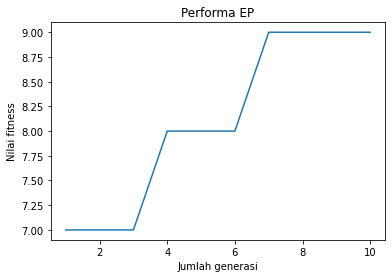

In [ ]:
x_axis = []
for i in range(num_generations):
    x_axis.append(i+1)
plt.plot(x_axis,y_axis)
plt.xlabel('Jumlah generasi')
plt.ylabel('Nilai fitness')
plt.title('Performa EP')